In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
#Cargar datos a partir de fichero de entrada
def load_data(input_file):
    X = []
    with open(input_file, 'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)

    return np.array(X)

In [3]:
# Cargar los datos
data = load_data('data_multivar.txt')
num_clusters = 4
print(data)

[[ 5.35  4.48  0.  ]
 [ 6.72  5.37  0.  ]
 [ 3.57  5.25  0.  ]
 [ 4.77  7.65  1.  ]
 [ 2.25  4.07  1.  ]
 [ 6.08  3.01  1.  ]
 [ 4.91  5.52  0.  ]
 [ 5.79  4.09  0.  ]
 [ 5.03  5.92  0.  ]
 [ 5.51  7.32  1.  ]
 [ 3.49  4.08  1.  ]
 [ 7.32  2.71  1.  ]
 [ 4.5   4.76  0.  ]
 [ 5.35  4.94  0.  ]
 [ 5.18  4.91  0.  ]
 [ 4.77  9.15  1.  ]
 [ 2.5   4.35  1.  ]
 [ 7.94  2.91  1.  ]
 [ 5.5   4.64  0.  ]
 [ 5.62  3.42  0.  ]
 [ 4.15  5.95  0.  ]
 [ 5.04  8.56  1.  ]
 [ 2.22  4.78  1.  ]
 [ 7.77  4.21  1.  ]
 [ 5.36  4.24  0.  ]
 [ 4.82  5.52  0.  ]
 [ 4.23  5.83  0.  ]
 [ 3.74  8.74  1.  ]
 [ 1.7   4.53  1.  ]
 [ 7.    2.86  1.  ]
 [ 4.73  4.12  0.  ]
 [ 6.4   4.21  0.  ]
 [ 4.4   6.27  0.  ]
 [ 5.72  8.75  1.  ]
 [ 3.    3.56  1.  ]
 [ 6.48  3.14  1.  ]
 [ 4.33  4.09  0.  ]
 [ 5.16  4.34  0.  ]
 [ 5.67  5.67  0.  ]
 [ 3.88  7.5   1.  ]
 [ 3.41  4.62  1.  ]
 [ 6.76  3.71  1.  ]
 [ 4.02  5.46  0.  ]
 [ 6.18  5.67  0.  ]
 [ 4.9   5.3   0.  ]
 [ 5.82  9.13  1.  ]
 [ 2.43  2.87  1.  ]
 [ 6.12  3.68

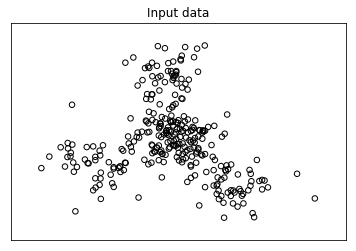

In [4]:
#Pintar los puntos
plt.scatter(data[:,0], data[:,1], marker='o',
        facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.figure()

In [5]:
# Entrenar el modelo
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
# Tamano de la malla
step_size = 0.01

# Dibujar los limites
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

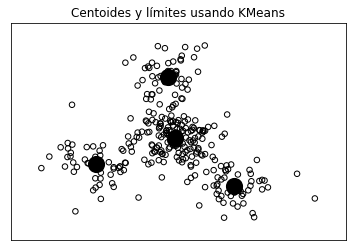

In [7]:
plt.scatter(data[:,0], data[:,1], marker='o',
        facecolors='none', edgecolors='k', s=30)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3,
        color='k', zorder=10, facecolors='black')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Centoides y límites usando KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

### Performance


Number of clusters = 2
Silhouette score = 0.365475672471

Number of clusters = 3
Silhouette score = 0.45183548643

Number of clusters = 4
Silhouette score = 0.54536418687

Number of clusters = 5
Silhouette score = 0.431922591615

Number of clusters = 6
Silhouette score = 0.429211019083

Number of clusters = 7
Silhouette score = 0.414208864831

Number of clusters = 8
Silhouette score = 0.402734165867

Number of clusters = 9
Silhouette score = 0.333699718345


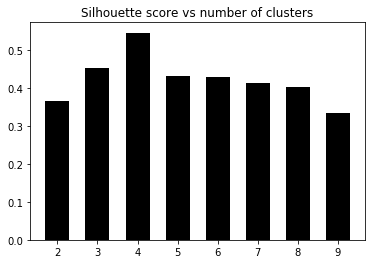

In [8]:
scores = []
range_values = np.arange(2, 10)

for i in range_values:
    # Train the model
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(data)
    score = metrics.silhouette_score(data, kmeans.labels_,
                metric='euclidean', sample_size=len(data))

    print('\nNumber of clusters =', i)
    print('Silhouette score =', score)

    scores.append(score)

# Plot scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette score vs number of clusters')